# Objetivos do Projeto

- Conhecer e limpar os dados
- Criar perguntas de negócio para direcionar as análises
- Analisar variáveis nos dados para obter padrões e insights

# Dados

- Os dados utilizados no projeto podem ser encontrados no repositório 

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [30]:
dados = pd.read_csv('marketing_data.csv')
display(dados)

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


# Informações Relevantes

- O dataset possui 2240 linhas e 28 colunas
- A maioria dos dados apresentados são do tipo int
- A coluna `income` possui dados ausentes, além de um espaço extra no nome da coluna, desta forma, será necessária alguma limpeza nos dados
- As colunas podem ser renomeadas de forma maus eficiente
- Podemos obter algumas estatísticas resumidas importantes sobre os dados

In [31]:
dados.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [32]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [33]:
# Vejamos quais colunas possuem dados faltantes
dados.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [34]:
dados.describe

<bound method NDFrame.describe of          id  YearBirth   Education MaritalStatus       Income  Kidhome  \
0      1826       1970  Graduation      Divorced  $84,835.00         0   
1         1       1961  Graduation        Single  $57,091.00         0   
2     10476       1958  Graduation       Married  $67,267.00         0   
3      1386       1967  Graduation      Together  $32,474.00         1   
4      5371       1989  Graduation        Single  $21,474.00         1   
...     ...        ...         ...           ...          ...      ...   
2235  10142       1976         PhD      Divorced  $66,476.00         0   
2236   5263       1977    2n Cycle       Married  $31,056.00         1   
2237     22       1976  Graduation      Divorced  $46,310.00         1   
2238    528       1978  Graduation       Married  $65,819.00         0   
2239   4070       1969         PhD       Married  $94,871.00         0   

      Teenhome DtCustomer  Recency  MntWines  ...  NumStorePurchases  \
0    

# Data Cleaning

 Como dito anteriormente, a coluna `Income` precisa de uma limpeza, assim como as demais colunas também podem ser renomeadas de forma mais otimizada, isto pode ser feito da seguinte maneira:
 
 - Colocar todas as colunas em `Snake Case Format` usando regex e list comprehension
 - Mudar valores da coluna `Income` para o tipo float

In [35]:
# Limpando Colunas

# Retirando o cifrão dos valores, e convertendo em float
dados['Income'] =dados['Income'].replace('[\$,]', '', regex=True).astype(float)

In [36]:
# Estatísticas Resumidas
dados['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [37]:
# Colocando todas as colunas em snake case format
dados.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in dados.columns]

In [38]:
dados.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_products', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'response', 'complain', 'country'],
      dtype='object')

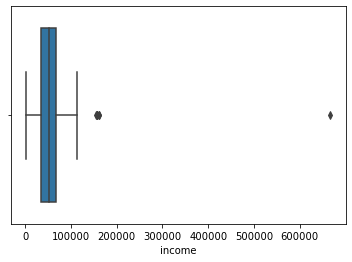

In [49]:
import warnings
warnings.filterwarnings('ignore')
plt.figure()
sns.boxplot(dados["income"])
plt.show()

- O Boxplot mostra um outlier muito à direita da distribuição, o qual deverá ser removido
- Podemos tornar a distribuição dos dados mais simétrica selecionando apenas valores de renda menores que 300000

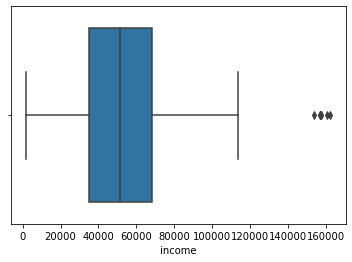

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

In [51]:
dados = dados[dados['income']<300000]

plt.figure()
sns.boxplot(dados["income"])
plt.show()


dados['income'].describe()